In [13]:
#NS Flash assignment 1

# Data cleanup

%pip install pandas networkx matplotlib seaborn numpy scipy

   ---------------------------------------- 0.0/38.7 MB ? eta -:--:--
   -- ------------------------------------- 2.1/38.7 MB 11.8 MB/s eta 0:00:04
   ---- ----------------------------------- 4.5/38.7 MB 10.8 MB/s eta 0:00:04
   ------ --------------------------------- 6.6/38.7 MB 10.9 MB/s eta 0:00:03
   -------- ------------------------------- 8.7/38.7 MB 10.5 MB/s eta 0:00:03
   ----------- ---------------------------- 10.7/38.7 MB 10.5 MB/s eta 0:00:03
   ------------- -------------------------- 13.1/38.7 MB 10.4 MB/s eta 0:00:03
   --------------- ------------------------ 14.9/38.7 MB 10.2 MB/s eta 0:00:03
   ----------------- ---------------------- 17.3/38.7 MB 10.3 MB/s eta 0:00:03
   -------------------- ------------------- 19.4/38.7 MB 10.2 MB/s eta 0:00:02
   ---------------------- ----------------- 21.8/38.7 MB 10.3 MB/s eta 0:00:02
   ------------------------ --------------- 23.9/38.7 MB 10.2 MB/s eta 0:00:02
   --------------------------- ------------ 26.2/38.7 MB 10.3 MB/

In [63]:
# Import libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [67]:
# Load dataset

df = pd.read_csv(r'D:\Network_Science\Assignment_1\pairwise_52seconds_share.csv')
print(df.head())
print(df.info())

   Unnamed: 0      videoID                  userID_1  \
0           0  -6bGXfM8-gs  19372991|840224732847833   
1          10  -fJbMWhkTAw    Ej8Mm0YMadzmx4osDA_hgg   
2          11  -ilNuSh1Fgw    feNNP607aG1F64jR6bk8jw   
3          12  -ilNuSh1Fgw    5SDVRa-J-_cWYP6g0WNzLw   
4          13  -ilNuSh1Fgw    42Egn_22OjOzg2XMqAa9_g   

                   userID_2          timestamp_1          timestamp_2  \
0  19372991|840224732847833  2018-07-22 21:19:58  2018-07-22 21:19:58   
1    Ej8Mm0YMadzmx4osDA_hgg  2018-08-01 00:51:08  2018-08-01 00:51:08   
2    CVEf5dB1MvNRTQFYivAIPQ  2018-04-27 22:28:49  2018-04-27 22:29:36   
3    jz6hyweGgVHGTw-PbEMqKw  2018-05-14 16:52:08  2018-05-14 16:52:24   
4    poH0yvIGbS5_7MdXM4EuRA  2018-05-14 16:55:04  2018-05-14 16:55:15   

   time_diff_seconds  
0                0.0  
1                0.0  
2               47.0  
3               16.0  
4               11.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns

In [68]:
# Check value counts of individual columns?

# Do we have to do data cleanup?
# Missing values, duplicates, invalid values

# Missing values per column
print("\nMissing Values per column")
print(df.isnull().sum())

# Duplicate rows
print(f"\nDuplicate Rows : {df.duplicated().sum()}")

# -- Invalid values --

# - Time diff > 52 or < 0
invalid_time_diff = df[(df['time_diff_seconds'] < 0.0) | (df['time_diff_seconds'] > 52.0)]
print(f"\nRows with invalid time differences: {len(invalid_time_diff)}")

# - User connected to itself
same_user = df[df['userID_1'] == df['userID_2']]
print(f"Rows that connect edge to itself: {len(same_user)}") # - 344 instances. Likely needs to be cleaned

#df = df[df['userID_1'] != df['userID_2']] # Remove self-mentions

zero_time_diff = df[df['time_diff_seconds'] == 0.0]
print(f"Number of edges where time_diff_seconds is 0.0: {len(zero_time_diff)}") # Still 14 instances

# TODO Are these legit?

print(zero_time_diff)

print(df.info())


Missing Values per column
Unnamed: 0           0
videoID              0
userID_1             0
userID_2             0
timestamp_1          0
timestamp_2          0
time_diff_seconds    0
dtype: int64

Duplicate Rows : 0

Rows with invalid time differences: 0
Rows that connect edge to itself: 344
Number of edges where time_diff_seconds is 0.0: 358
      Unnamed: 0      videoID                  userID_1  \
0              0  -6bGXfM8-gs  19372991|840224732847833   
1             10  -fJbMWhkTAw    Ej8Mm0YMadzmx4osDA_hgg   
38            47  0EXtHoOi7_4    jQtK7QT81K0PpttfUiwmfw   
40            50  0EXtHoOi7_4    sBW5vM4w0wRHGdN5_BUFLA   
43            53  0EXtHoOi7_4  1953463|1594034473978781   
...          ...          ...                       ...   
4146        4729  zZX63gclkPg   318216|2385793868105882   
4147        4730  zonfzISJCZU    t6R5qaDv85mwqa0BuR7Y2w   
4150        4735  zwQvinmry5U    IRoa12duxmiShFybwLMwuQ   
4468        5053  zwQvinmry5U    T3Z9E-bhngbpBm4yo6LDKA   
4

In [70]:
# Building the network graph
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G = nx.from_pandas_edgelist( # Creating an edgelist from the dataframe
    df,
    source='userID_1', # Undirected network. Edges between users
    target='userID_2',
    edge_attr=['videoID', 'time_diff_seconds'],
    create_using=nx.Graph()
)


 -- Relevant Network Info --

Average degree: 2.0557710960232782
e31WRxTfcKFueivGE9b1Rw- Degree: 9
YzFk1MEJhjvlfYXinsGx1g- Degree: 9
vzlad2VghZ_r7xbqXuy-kA- Degree: 9
TwqU8KNPDxkW9gnQars6DQ- Degree: 9
2g1oXEhrw6RBlbZmLHMaSw- Degree: 9
KyBp5nYNqKLc9EcZV20usQ- Degree: 9
1i1qABhZWdcqsiAJBYHBIg- Degree: 8
EgH0Sa9C2KrzFzqi8BBnbA- Degree: 8
xXAIsOSaBeoFCq8lRKGR_g- Degree: 8
k0Q0MCjB2V4eU2XhIVTJtQ- Degree: 8

Number of connected components: 1249
Size of the largest connected component: 74

Density: 0.0004986105010970842
Average clustering coefficient: 0.2929593321324655

Betweenness centrality per node:
b950yxwJQGjVmoG4pSUEZA: 0.000156
tI3qKRO-MDUoTZY5_25a8Q: 0.000155
czzKbPklfpc0aicOlqMU2g: 0.000117
e9iA8nroxSWIb9FmVhqH6A: 0.000110
84maZ9iYIsNlENSn6dA8aQ: 0.000089
t4U8uaKBhrHHP1hAnGicCw: 0.000082
2niIUYgZN6_HoX6aUajhMw: 0.000082
1afk8lq17DQoGT_gW9c6SA: 0.000079
19xP1dfrchpFTSABKxq8tQ: 0.000075
UI8cN_xDD2Y0OYvNyCCqiQ: 0.000075

Degrees centrality per node:
e31WRxTfcKFueivGE9b1Rw: 0.002183
Yz

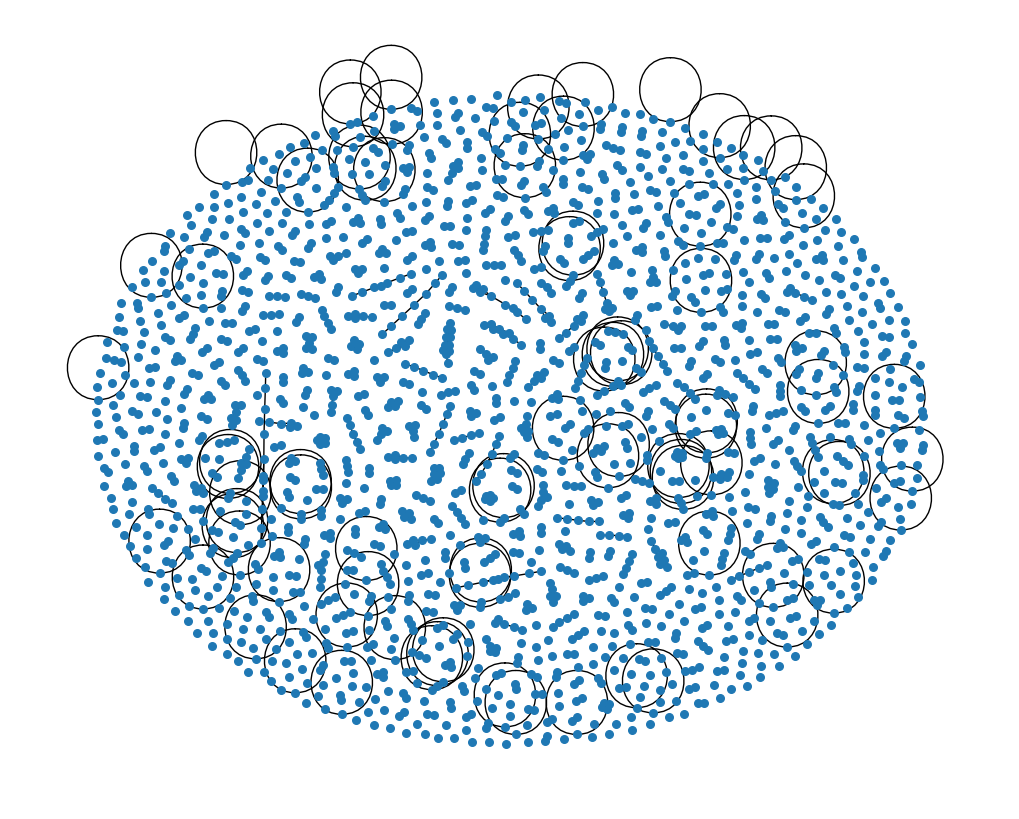

In [72]:
# Extract Relevant Network information
print("\n -- Relevant Network Info --\n")
print(f"Average degree: {sum(dict(G.degree()).values()) / G.number_of_nodes()}")

# Highest n in Degree
for node, deg in sorted(dict(G.degree()).items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{node}- Degree: {deg}")

print(f"\nNumber of connected components: {nx.number_connected_components(G)}")

# Size of largest component
largest_component = max(nx.connected_components(G), key=len)
comp_size = len(largest_component)
print(f"Size of the largest connected component: {comp_size}")

print(f"\nDensity: {nx.density(G)}")
print(f"Average clustering coefficient: {nx.average_clustering(G)}")

# TODO: Shortest path length not possible, since graph is not connected? Focus on largest component (LCC)?
# TODO: Connectivity: Graph is not connected tho


# Betweenness Centrality

#print(f"Betweenness centrality: {nx.betweenness_centrality(G)}") - Prints for every node

bet_cent = nx.betweenness_centrality(G)

# TODO: set mean

highest_n = sorted(bet_cent.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nBetweenness centrality per node:")
for node, bc in highest_n:
    print(f"{node}: {bc:.6f}")


# Degrees Centrality

deg_cent = nx.degree_centrality(G)

highest_n = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nDegrees centrality per node:")
for node, bc in highest_n:
    print(f"{node}: {bc:.6f}")

# TODO: set mean

# TODO: Networkx also provides: Load_centrality; Eigenvector centrality; edge betweenness


# -- Visualize the current graph (Not helpful) -- 
import random
sample_nodes = random.sample(list(G.nodes()), 2000)
G_1 = G.subgraph(sample_nodes)
plt.figure(figsize=(10, 8))
nx.draw(G_1, with_labels=False, node_size=30)
plt.show()

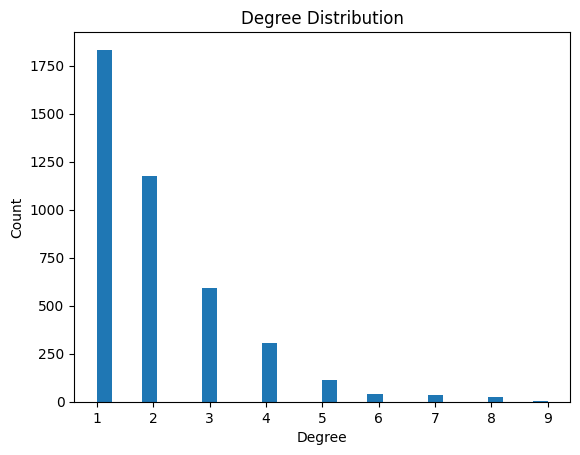

In [73]:
# Plotting vertex degree distribution

degrees = [d for n, d in G.degree()]
plt.hist(degrees, bins=30)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

In [ ]:
# Create sub-networks - Merel?

In [ ]:
# Choose 5 Network Metrics from:

# Clustering Coefficient

# Average shortest path length?

# Connectivity?

# Density of the network 

# Betweenness Centrality

# Degrees Centrality

# (Load Centrality; Eigenvector centrality?)

# degree_assortativity_coefficient?

Generate Artificial Network - Watts-Strogatz (WS) graph

- Antoine


Generate Artificial Network - Barabási-Albert

- Daniel